### **Verify Kinematic Map Using Solidworks**

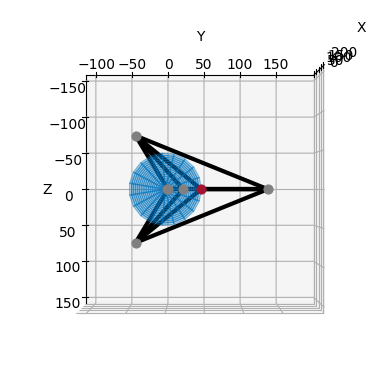

A: 52.0630 B: 115.8370 C: 186.9120 D: 189.7910 Lc: 206.6524 Ht: 51.2632 Dt: 103.8764 Gt: 96.0015


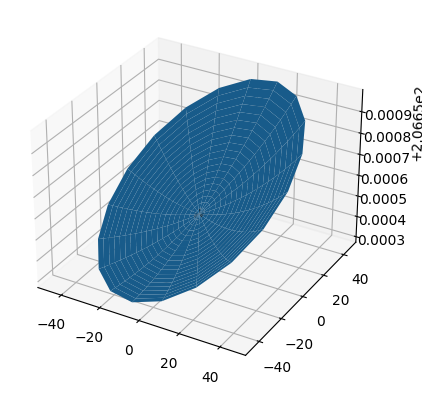

[ 2.06650955e+02  4.58116067e+01 -7.14693651e-04]


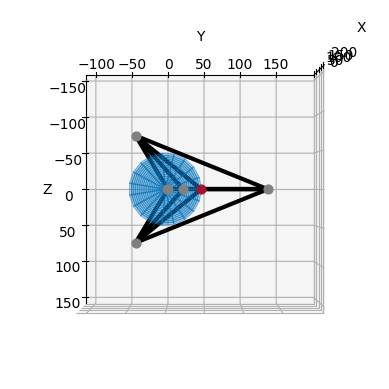

In [1]:
from src.PPM import ppm
from matplotlib import pyplot as plt
import numpy as np

def save_solidworks(PPM,theta,phi):
    with open('equations.txt', 'w') as f:
        # Loop through and save
        f.write("THETA = {}\n".format(theta))
        f.write("PHI = {}\n".format(theta))
        for i,link in enumerate(PPM.links):
            f.write("\""+link+"\" = {}\n".format(PPM.link_lengths[i]))

# Define mechanism, add noise, and save lengths for solidworks
PPM = ppm.mechanism(A=52.063,B=115.837,C=186.912,D=189.791)
PPM.add_noise(0.05/100,3)

THETA,PHI = 25,0
PPM.theta = np.deg2rad(THETA)
PPM.phi = np.deg2rad(PHI)
save_solidworks(PPM,THETA,PHI)
# # Use debug flag to check that all link lengths remain constant
PPM.update_state(debug=False)
PPM.draw()
PPM.print_params()
PPM.plot_surface()
print(PPM.N[6])
PPM.draw()


### **Sweep of P_error (100*sigma/L_char)**

In [51]:
from src.PPM import ppm
from matplotlib import pyplot as plt
import numpy as np

# Sim params
samples = 100

# Define ranges we want to look at
E_in = np.linspace(0,.3,20) # mm
Lc_scale = np.linspace(1/2,2,20)
LC = 245.4617 # Measured

E_in_Lc = np.zeros(np.size(E_in)*np.size(Lc_scale)) # Input Error
E_out_Lc = np.zeros(np.size(E_in)*np.size(Lc_scale)) # Output error
count = 0

# Sweep over combinations of E_in and Lc
for e in E_in:
    for scale in Lc_scale:
            lc = LC*scale
            E = []
            E_in_Lc[count] = e/lc
            PPM = ppm.mechanism(H=scale*35.6089,D=scale*88.0696,G=144.5736,Lc=lc)
            for test in range(samples):
                try:
                    PPM.add_noise(e,test)
                    e_out,w = PPM.find_random_surface(100)
                    E.append(e_out)
                except Exception as err:
                        print(err)
            # Allow for 5% failure rate
            if len(E) == samples:
                E_out_Lc[count] = np.mean(E)/lc
            else:
                E_out_Lc[count] = np.NaN
            count += 1

### **Plot Results**

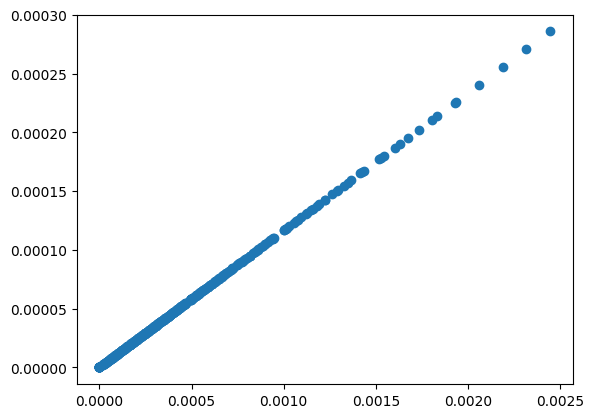

[7.10251054e-16 1.71197165e-15 4.82553392e-16 1.22674753e-15
 1.79052018e-15 3.21655747e-16 1.44789116e-15 1.09698729e-15
 1.79547883e-15 1.34588311e-15 3.15464222e-16 1.32843017e-15
 1.76694771e-15 1.38313968e-15 2.19885696e-15 2.45285441e-15
 1.71432754e-15 1.23301851e-15 6.25684301e-16 7.57110576e-16
 1.50283495e-05 1.18985916e-05 9.84774591e-06 8.39993599e-06
 7.32327513e-06 6.49126005e-06 5.82901256e-06 5.28938275e-06
 4.84120138e-06 4.46303823e-06 4.13967397e-06 3.86000208e-06
 3.61572750e-06 3.40052999e-06 3.20950942e-06 3.03880816e-06
 2.88534780e-06 2.74664190e-06 2.62066021e-06 2.50572863e-06
 3.00437939e-05 2.37887653e-05 1.96895781e-05 1.67954934e-05
 1.46431792e-05 1.29798454e-05 1.16558516e-05 1.05769646e-05
 9.68088624e-06 8.92478200e-06 8.27823013e-06 7.71902917e-06
 7.23059713e-06 6.80029933e-06 6.41833978e-06 6.07700638e-06
 5.77014476e-06 5.49278388e-06 5.24086466e-06 5.01104006e-06
 4.50488463e-05 3.56717722e-05 2.95262073e-05 2.51871140e-05
 2.19600055e-05 1.946596

In [47]:
plt.scatter(E_in_Lc,E_out_Lc)
plt.show()
print(E_out_Lc)

#### Save output

In [48]:
E = np.vstack((E_in_Lc,E_out_Lc)).T

sim_path = "ks_linear_sim.csv"

with open(sim_path, "w") as f:
    f.write("E_in,E_out,\n")
    np.savetxt(f,E,delimiter=',')

### **Test Different Types of PPMs**

A: 52.0630 B: 115.8370 C: 186.9120 D: 189.7910 Lc: 206.6524 Ht: 51.2632 Dt: 103.8764 Gt: 96.0015


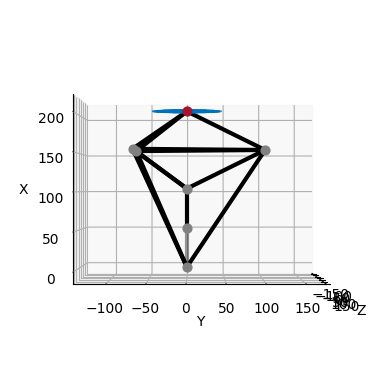

In [68]:
from src.PPM import ppm
from matplotlib import pyplot as plt
import numpy as np

ppm_dict = {"sub_optimal":ppm.mechanism(Lc=1,H=0.2525,D=(0.2525)/(0.4575),G=90),
            "optimal_build":ppm.mechanism(Lc=1,H=1*0.25,D=1*(0.25)/(0.5),G=90),
            "optimal_sim":ppm.mechanism(Lc=1,H=0.26,D=(0.26)/(0.45),G=90),
            "close_optimal":ppm.mechanism(Lc=1,H=0.262359550561798,D=(0.262359550561798)/(0.497752808988764),G=90.2247191011236),
            "medium":ppm.mechanism(A=87.122,B=94.996,C=227.584,D=142.25),
            "medium_optimal":ppm.mechanism(Lc=245.4617,H=35.6089,D=88.0696,G=85),
            "large":ppm.mechanism(A=679,B=1006.7,C=1973,D=1600.309),
            "opt_1":ppm.mechanism(A=65.56,B=147.91,C=234.9666667,D=241.65),
            "opt_2":ppm.mechanism(A=86.988,B=192.249,C=315.776,D=309.931),
            "opt_3":ppm.mechanism(A=52.063,B=115.837,C=186.912,D=189.791)}

PPM = ppm_dict["opt_3"]

PPM.print_params()
PPM.draw()

In [40]:
# Run small batch simulation for one PPM
n_ppms = 50
noise = 0.05

Sk = np.zeros(n_ppms)

for i in range(n_ppms):
    PPM.add_noise((noise*PPM.L_char)/100,i)
    RMSE_out,r = PPM.find_random_surface(50,debug=True)
    Sk[i] = RMSE_out/(PPM.RMSE_in)
    # Sk[i] = RMSE_out/(PPM.RMSE_in)


print("SK: {:.8f}".format(np.mean(Sk)))

A0: Truth [0.24088202617298382] Calc [0.24088202617298382] Error (0.0)
A1: Truth [0.2402000786041836] Calc [0.24020007860418358] Error (2.7755575615628914e-17)
B0: Truth [0.6340721658653796] Calc [0.6340721658653797] Error (-1.1102230246251565e-16)
B1: Truth [0.6347032434729275] Calc [0.6347032434729275] Error (0.0)
B2: Truth [0.6345165758684017] Calc [0.6345165758684017] Error (0.0)
B3: Truth [0.6330941579333885] Calc [0.6330941579333885] Error (0.0)
B4: Truth [0.6340578410820895] Calc [0.6340578410820897] Error (-2.220446049250313e-16)
B5: Truth [0.6335071182691779] Calc [0.6335071182691779] Error (0.0)
C0: Truth [0.9387919134754583] Calc [0.9387919134754584] Error (-1.1102230246251565e-16)
C1: Truth [0.9390488221523243] Calc [0.9390488221523244] Error (-1.1102230246251565e-16)
C2: Truth [0.9389155446869355] Calc [0.9389155446869355] Error (0.0)
D0: Truth [1.0683212632109687] Calc [1.068321263210967] Error (1.5543122344752192e-15)
D1: Truth [1.0679746453200605] Calc [1.06797464532006

### **Simulate Output Surfaces for Experimental Results**

A: 52.0630 B: 115.8370 C: 186.9120 D: 189.7910 Lc: 206.6524 Ht: 51.2632 Dt: 103.8764 Gt: 96.0015


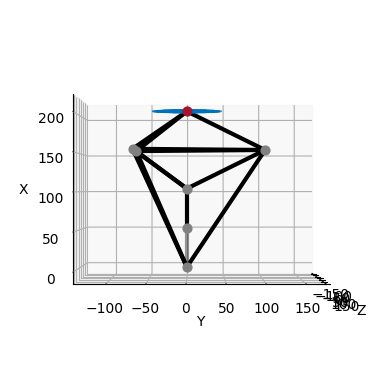

A: 65.1530 B: 147.4660 C: 235.1080 D: 241.6880 Lc: 257.3139 Ht: 63.5040 Dt: 133.0919 Gt: 99.0927


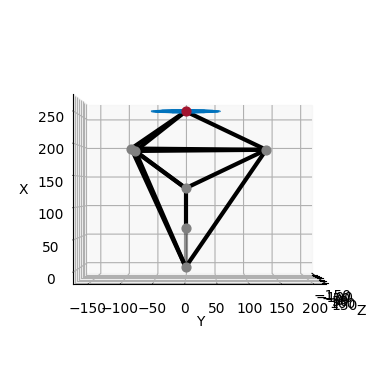

A: 86.9680 B: 192.2493 C: 315.7760 D: 304.2110 Lc: 360.7918 Ht: 93.4279 Dt: 168.0209 Gt: 100.5575


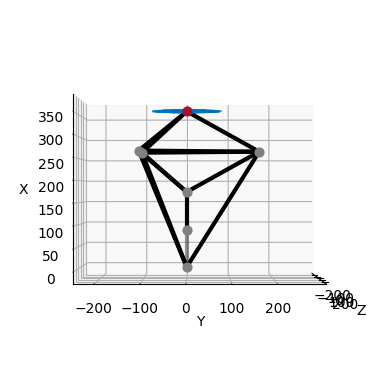

In [3]:
from src.PPM import ppm
import numpy as np

# LC = 206
PPM = ppm.mechanism(A=52.063,B=115.837,C=186.912,D=189.791)
PPM.A = [52.08,52.046]
PPM.B = [115.616,115.576,116.026,115.946,115.736,116.126]
PPM.C = [186.706,186.906,187.126]
PPM.D = [189.656,189.926]
PPM.print_params()
PPM.draw()

PPM.find_surface(100,100)
np.savetxt("./results/kinematic/sim/LC-206.csv",np.vstack((PPM.X.flatten(),PPM.Y.flatten(),PPM.Z.flatten(),PPM.RES.flatten())).T,header="X Y Z D",comments='')

# LC = 254
PPM = ppm.mechanism(A=65.153,B=147.466,C=235.108,D=241.688)
PPM.A = [65.18,65.126]
PPM.B = [147.476,147.406,147.416,147.466,147.526,147.506]
PPM.C = [235.118,235.368,234.838]
PPM.D = [241.618,241.758]
PPM.print_params()
PPM.draw()

PPM.find_surface(100,100)
np.savetxt("./results/kinematic/sim/LC-254.csv",np.vstack((PPM.X.flatten(),PPM.Y.flatten(),PPM.Z.flatten(),PPM.RES.flatten())).T,header="X Y Z D",comments='')

# LC = 360
PPM = ppm.mechanism(A=86.968,B=192.2493333,C=315.776,D=304.211)
PPM.A = [86.99,86.946]
PPM.B = [192.386,192.516,192.046,192.286,192.076,192.186]
PPM.C = [315.686,315.766,315.876]
PPM.D = [304.086,304.336]
PPM.print_params()
PPM.draw()

PPM.find_surface(100,100)
np.savetxt("./results/kinematic/sim/LC-360.csv",np.vstack((PPM.X.flatten(),PPM.Y.flatten(),PPM.Z.flatten(),PPM.RES.flatten())).T,header="X Y Z D",comments='')